Import

In [141]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gc
sklearn.__version__

'1.7.1'

### Trick 01 - کاربرد Random State در Scikit-Learn


In [142]:
df = pd.read_csv("../../00 DATA/titanic.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [143]:
cols = ['fare','embarked','sex']
x = df[cols]
y = df['survived']

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
x

,fare,embarked,sex
0,211.3375,S,female
1,151.5500,S,male
2,151.5500,S,female
3,151.5500,S,male
4,151.5500,S,female
...,...,...,...
1304,14.4542,C,female
1305,14.4542,C,female
1306,7.2250,C,male
1307,7.2250,C,male


In [146]:
x_test,x_train,y_train,y_test = train_test_split(x,y,test_size=0.5, random_state=1)
x_train.head()

,fare,embarked,sex
201,51.8625,S,male
115,263.0000,S,male
255,69.3000,C,female
1103,39.6875,S,male
195,86.5000,S,female


In [147]:
x_test,x_train,y_train,y_test = train_test_split(x,y,test_size=0.5, random_state=1)
x_train.head()

,fare,embarked,sex
201,51.8625,S,male
115,263.0000,S,male
255,69.3000,C,female
1103,39.6875,S,male
195,86.5000,S,female


In [148]:
# هر بار که این دستور رو اجرا کنیم باز هم یک دیتا رو میگیرم چون رندوم استیت یک هست


In [149]:
x_test,x_train,y_train,y_test = train_test_split(x,y,test_size=0.5, random_state=42)
x_train.head()

,fare,embarked,sex
1148,7.1250,S,male
1049,15.7417,C,male
982,7.8958,S,male
808,8.0500,S,male
1195,7.7500,Q,male


In [150]:
x_test,x_train,y_train,y_test = train_test_split(x,y,test_size=0.5, random_state=42)
x_train.head()

,fare,embarked,sex
1148,7.1250,S,male
1049,15.7417,C,male
982,7.8958,S,male
808,8.0500,S,male
1195,7.7500,Q,male


In [151]:
# اما وقتی رندوم استیت رو عوض کنیم هر بار تفاوت خواهیم داشت

In [152]:
del df,x,y,x_test,x_train,y_train,y_test, cols
gc.collect()

0

### Trick 02 - کاربرد Stratify در Scikit-Learn

In [153]:
# هدف اینه که تقسیم بندی دیتا تست و ترین رو به یک نوع انجام دهیم که که تناسب کفیت داشته باشن


df = pd.DataFrame({'feature':list(range(12)), 'target':['Not Fraud']*10 + ['Fraud']*2})
#dft02.sample()


In [154]:
x = df['feature']
y = df['target']


In [155]:
from sklearn.model_selection import train_test_split

#### **Not stratified**

`y_train` contains **NONE** of the minority class, whereas `y_test` contains **ALL** of the minority class. (This is bad!)

In [156]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5, random_state=0)

In [157]:
y_train

1    Not Fraud
7    Not Fraud
9    Not Fraud
3    Not Fraud
0    Not Fraud
5    Not Fraud
Name: target, dtype: object

In [158]:
y_test

6     Not Fraud
11        Fraud
4     Not Fraud
10        Fraud
2     Not Fraud
8     Not Fraud
Name: target, dtype: object

#### Stratified

Class proportions are the **SAME** in `y_train` and `y_test`. (This is good!)

In [159]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5, random_state=0, stratify=y)

In [160]:
y_train

2     Not Fraud
8     Not Fraud
4     Not Fraud
1     Not Fraud
11        Fraud
9     Not Fraud
Name: target, dtype: object

In [161]:
y_test

0     Not Fraud
7     Not Fraud
3     Not Fraud
5     Not Fraud
10        Fraud
6     Not Fraud
Name: target, dtype: object

#### Delete

In [162]:
del df,x,y,x_test,x_train,y_train,y_test
gc.collect()

0

### Trick 03 - کاربرد Missing Indicator در Scikit-Learn

In [163]:
#این مثال رو در نظر بگیرید

x = pd.DataFrame({
    'age':[20,30, 10 , np.nan, 10]
})
x

,age
0,20.0
1,30.0
2,10.0
3,NaN
4,10.0


In [164]:
""" ما نمی تونیم دیتایی که نات نامبر هست رو نگر داریم برای همین باید یه فکری براش بکنیم
مثلا باید دراپشون کنیم
یکی از راها اینه که با میانگین گرفتن از بقیه ریکورد ها جاشو پر کنیم
"""
from sklearn.impute import SimpleImputer

In [165]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#'constant', 'median', 'most_frequent', 'mean'
# imputer = SimpleImputer()
imputer.fit_transform(x)


array([[20. ],
       [30. ],
       [10. ],
       [17.5],
       [10. ]])

In [166]:
imputer = SimpleImputer(missing_values=np.nan, strategy = 'median')
#'constant', 'median', 'most_frequent', 'mean'
# imputer = SimpleImputer()
imputer.fit_transform(x)


array([[20.],
       [30.],
       [10.],
       [15.],
       [10.]])

In [167]:
# پرچم گذاری : برای اینکه بفهمیم این داده میس ولو هست و توسط ما پر شده
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = SimpleImputer(add_indicator=True)
imputer.fit_transform(x)


array([[20. ,  0. ],
       [30. ,  0. ],
       [10. ,  0. ],
       [17.5,  1. ],
       [10. ,  0. ]])

In [168]:
del x, imputer
gc.collect()

0

### Trick 04 - کاربرد Pipeline در Scikit-Learn


In [169]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Feature selector that removes all low-variance features.
from sklearn.feature_selection import VarianceThreshold

# For setting up pipeline
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV

In [170]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data',
    sep = '\s+',
    header=None)

df.head(50)

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Plat Mat\AppData\Local\Temp\ipykernel_22756\1871924619.py:3: SyntaxWarning: invalid escape sequence '\s'
  sep = '\s+',


,0,1,2,3,4,5,6,7,8
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
5,ALKH_ECOLI,0.67,0.39,0.48,0.5,0.36,0.38,0.46,cp
6,AMPD_ECOLI,0.29,0.28,0.48,0.5,0.44,0.23,0.34,cp
7,AMY2_ECOLI,0.21,0.34,0.48,0.5,0.51,0.28,0.39,cp
8,APT_ECOLI,0.20,0.44,0.48,0.5,0.46,0.51,0.57,cp
9,ARAC_ECOLI,0.42,0.40,0.48,0.5,0.56,0.18,0.30,cp


In [171]:
# The data matrix X
X = df.iloc[:,1:-1]
# The labels
y = (df.iloc[:,-1:])

In [172]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

E:\ML\MLproj002\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [173]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size= 1/3,
    random_state=0
)
print(X_train.shape, X_test.shape)

(224, 7) (112, 7)


In [174]:
knn = KNeighborsClassifier().fit(X_train, y_train)
print('Training set score: ' + str(knn.score(X_train,y_train)))
print('Test set score: ' + str(knn.score(X_test,y_test)))

Training set score: 0.9017857142857143
Test set score: 0.8482142857142857


Pipline

#### Setting Up a Machine Learning Pipeline

we’ll set up a very basic pipeline that consists of the following sequence:

1. Scaler: For pre-processing data, i.e., transform the data to zero mean and unit variance using the StandardScaler().
2. Feature selector: Use VarianceThreshold() for discarding features whose variance is less than a certain defined threshold.
3. Classifier: KNeighborsClassifier(), which implements the k-nearest neighbor classifier and selects the class of the majority k points, which are closest to the test example.

In [175]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', VarianceThreshold()),
    ('classifier', KNeighborsClassifier())
])

In [176]:
pipe.fit(X_train, y_train)

print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

Training set score: 0.8794642857142857
Test set score: 0.8392857142857143


#### Delete

In [177]:
del GridSearchCV,KNeighborsClassifier, VarianceThreshold, pipe, Pipeline,knn, y, y_train, y_test,X, X_train, X_test, df, encoder
gc.collect()

167

### Trick 05 - کاربرد Column Transformers در Scikit-Learn

In [178]:
df = pd.read_csv("../../00 DATA/titanic.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [179]:
cols = ['fare', 'embarked', 'sex', 'age']
X = df[cols]
X

,fare,embarked,sex,age
0,211.3375,S,female,29.00
1,151.5500,S,male,0.92
2,151.5500,S,female,2.00
3,151.5500,S,male,30.00
4,151.5500,S,female,25.00
...,...,...,...,...
1304,14.4542,C,female,14.50
1305,14.4542,C,female,NaN
1306,7.2250,C,male,26.50
1307,7.2250,C,male,27.00


In [180]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, ColumnTransformer

In [181]:
ohe = OneHotEncoder()
si = SimpleImputer()

In [182]:
ct = make_column_transformer(
    (ohe, ['embarked', "sex"]),
    (si, ['fare']),
    remainder='passthrough'
)

In [183]:
ct.fit_transform(X)


array([[  0.    ,   0.    ,   1.    , ...,   0.    , 211.3375,  29.    ],
       [  0.    ,   0.    ,   1.    , ...,   1.    , 151.55  ,   0.92  ],
       [  0.    ,   0.    ,   1.    , ...,   0.    , 151.55  ,   2.    ],
       ...,
       [  1.    ,   0.    ,   0.    , ...,   1.    ,   7.225 ,  26.5   ],
       [  1.    ,   0.    ,   0.    , ...,   1.    ,   7.225 ,  27.    ],
       [  0.    ,   0.    ,   1.    , ...,   1.    ,   7.875 ,  29.    ]],
      shape=(1309, 8))

In [184]:
del ohe, ct,si ,df, cols,X, ColumnTransformer
gc.collect()

2526

### Trick 06 -نحوه انتخاب ستون ها با استفاده از Column Transformers

In [185]:
df = pd.read_csv("../../00 DATA/titanic.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [186]:
cols = ['fare', 'embarked', 'sex', 'age']
X = df[cols]
X

,fare,embarked,sex,age
0,211.3375,S,female,29.00
1,151.5500,S,male,0.92
2,151.5500,S,female,2.00
3,151.5500,S,male,30.00
4,151.5500,S,female,25.00
...,...,...,...,...
1304,14.4542,C,female,14.50
1305,14.4542,C,female,NaN
1306,7.2250,C,male,26.50
1307,7.2250,C,male,27.00


In [187]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer

In [188]:
ohe = OneHotEncoder()  # ساخت یک OneHotEncoder برای تبدیل داده‌های категоوری

ct = make_column_transformer((ohe, ['Embarked', 'Sex']))
ct = make_column_transformer((ohe, [1, 2]))
ct = make_column_transformer((ohe, slice(1, 3)))
ct = make_column_transformer((ohe, [False, True, True, False]))
ct = make_column_transformer((ohe, make_column_selector(pattern='E|S')))
ct = make_column_transformer((ohe, make_column_selector(dtype_include=object)))
ct = make_column_transformer((ohe, make_column_selector(dtype_exclude='number')))

In [189]:
ct.fit_transform(X)

array([[0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1.]], shape=(1309, 6))

Delete

In [190]:
del X, cols,ct,df,ohe,
gc.collect()

23

### ~~Trick 07 - نحوه دریافت Confusion Matrix در Scikit-Learn~~ منسوخ

### Trick 08 - نحوه ترسیم نمودار ROC Curve در Scikit-Learn

In [217]:
df = pd.read_csv("../../00 DATA/titanic.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [218]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

In [219]:
cols = ['pclass', 'fare', 'sibsp']
X = df[cols]
y = df['survived']


In [220]:
# حذف ردیف‌هایی که دارای مقادیر NaN هستند
X_clean = X.dropna()
y_clean = y[X_clean.index]

# تقسیم داده‌های تمیز
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)


In [221]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [222]:
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


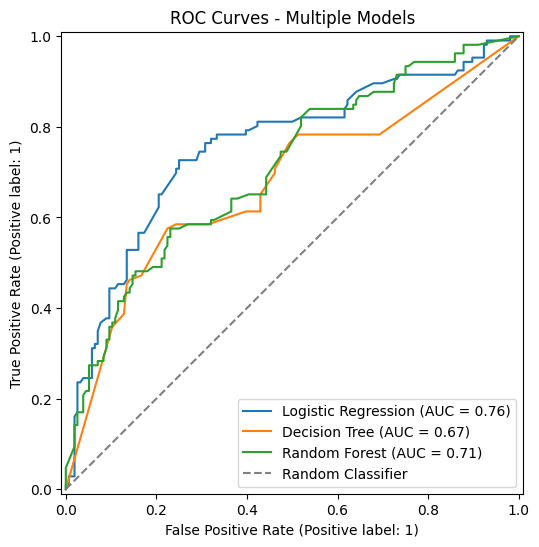

In [223]:
fig, ax = plt.subplots(figsize=(8, 6))

RocCurveDisplay.from_estimator(lr, X_test, y_test, ax=ax, name='Logistic Regression')
RocCurveDisplay.from_estimator(dt, X_test, y_test, ax=ax, name='Decision Tree')
RocCurveDisplay.from_estimator(rf, X_test, y_test, ax=ax, name='Random Forest')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.title('ROC Curves - Multiple Models')
plt.legend()
plt.show()

Delete

In [224]:
del df , fig ,ax, X, y ,X_train,X_test,y_train,y_test,X_clean,y_clean, lr ,rf,
gc.collect()

8312

### Trick 09 - تفاوت Drop و Passthrough در Column Transformers

In [207]:
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [208]:
impute = SimpleImputer()

In [209]:
X = pd.DataFrame({'A':[1, 2, np.nan],
                  'B':[10, 20, 30],
                  'C':[100, 200, 300],
                  'D':[1000, 2000, 3000],
                  'E':[10000, 20000, 30000]})

In [210]:
# impute A, passthrough B & C, then drop the remaining columns
ct = make_column_transformer(
    (impute, ['A']),
    ('passthrough', ['B', 'C']),
    remainder='drop')

In [212]:
ct.fit_transform(X)

array([[  1. ,  10. , 100. ],
       [  2. ,  20. , 200. ],
       [  1.5,  30. , 300. ]])

In [213]:
# impute A, drop D & E, then passthrough the remaining columns
ct = make_column_transformer(
    (impute, ['A']),
    ('drop', ['D', 'E']),
    remainder='passthrough')

In [214]:
ct.fit_transform(X)

array([[  1. ,  10. , 100. ],
       [  2. ,  20. , 200. ],
       [  1.5,  30. , 300. ]])

Delete

In [215]:
del ct, impute, X
gc.collect()

1856